## Introduction

[Bellabeat](https://bellabeat.com/) is a high-tech manufacturer of health-focused smart products for women. Bellabeat’s app and multiple smart devices collect data on activity, sleep, stress, hydration levels, and reproductive health to empower women with an understanding of their own health and habits. The company was founded in 2013 by Urška Sršen and Sando Mur and has expanded quickly since, now with the possibility to become a greater player in the global smart device market.

Bellabeat’s product line is made up of the Bellabeat app, which allows users insight into their health by providing data on their activity, sleep, stress, menstrual cycle, and mindfulness habits. The Bellabeat app also connects to the company’s line of smart device products. Leaf is Bellabeat’s classic wellness tracker that can be worn as a bracelet, necklace, or clip. Leaf tracks the user’s activity, sleep, and stress and connects to the Bellabeat app. Time is a wellness smart watch that also tracks the user’s activity, sleep, and stress and connects to the Bellabeat app. Spring is a smart water bottle that tracks the daily water intake of its user to ensure proper hydration levels are maintained throughout the day. Spring also connects to the Bellabeat app to track this data. Bellabeat membership is a subscription-based membership program that provides users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health, beauty, and mindfulness based on their lifestyle and goals.

## Business Task
Analyze smart device useage data in order to gain insight into how consumers use non-Bellabeat devices and then use discovered insights to guide marketing strategy. This would help identify opportunities for growth.

In-Scope:   

  1. Summary of business task    
  2. Description of data sources used   
  3. Documentation of data cleaning and manipulation processes   
  4. Summary of analysis   
  5. Relevant data visualization and key findings    
  6. High-level recommendations    

Out-of-Scope:
  
  1. Predictive analysis    
  2. Machine learning algorithm    
 
## Prepare
The data for this analysis comes from a dataset obtained from FitBit Fitness Trackers. The dataset consists of 18 comma-separated value (csv) files for 30 Fitbit users. The data tracked user activity between 03/12/2016 and 05/12/2016 including minute-level output for physical activity, heart rate, and sleep monitoring. 
Critical limitations for this data exist due to the small sample size and absence of key demographic information of the participants, such as gender, age, and location.

To conduct this analysis, data used include datasets for daily activity, daily calories, daily intensities, daily steps, heart rate by seconds, minute METs, daily sleep, and weight log information.

The analysis is conducted in R Studio.

In [1]:
# Install and load packages
library("tidyverse")
library("dplyr")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



The data  sets were initially opened in Microsoft Excel to inspect column formats. Columns with dates were changed to "date" format as applicable. These selected files were then imported to R Studio as dataframes. 

In [2]:
# Import data sets
daily_activity <- read_csv("../input/bellabeat-fitbit-datasets/dailyActivity_merged.csv",show_col_types = FALSE)
daily_calories <- read_csv("../input/bellabeat-fitbit-datasets/dailyCalories_merged.csv",show_col_types = FALSE)
daily_intensities <- read_csv("../input/bellabeat-fitbit-datasets/dailyIntensities_merged.csv",show_col_types = FALSE)
daily_steps <- read_csv("../input/bellabeat-fitbit-datasets/dailySteps_merged.csv",show_col_types = FALSE)
heart_rate_sec <- read_csv("../input/bellabeat-fitbit-datasets/heartrate_seconds_merged.csv",show_col_types = FALSE)
minute_METs <- read_csv("../input/bellabeat-fitbit-datasets/minuteMETsNarrow_merged.csv",show_col_types = FALSE)
sleep_day <- read_csv("../input/bellabeat-fitbit-datasets/sleepDay_merged.csv",show_col_types = FALSE)
weight_log <- read_csv("../input/bellabeat-fitbit-datasets/weightLogInfo_merged.csv",show_col_types = FALSE)

## Process
Once data frames have been imported into R Studio, the head() and colnames() functions were used to view the data frames to ensure they were imported correctly into R Studio.

In [3]:
# View data frames
head(daily_activity)
colnames(daily_activity)

head(daily_calories)
colnames(daily_calories)

head(daily_intensities)
colnames(daily_intensities)

head(daily_steps)
colnames(daily_steps)

head(heart_rate_sec)
colnames(heart_rate_sec)

head(minute_METs)
colnames(minute_METs)

head(sleep_day)
colnames(sleep_day)

head(weight_log)
colnames(weight_log)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

Id,ActivityDay,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,1985
1503960366,4/13/2016,1797
1503960366,4/14/2016,1776
1503960366,4/15/2016,1745
1503960366,4/16/2016,1863
1503960366,4/17/2016,1728


[1] "Id"          "ActivityDay" "Calories"

Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,728,328,13,25,0,6.06,0.55,1.88
1503960366,4/13/2016,776,217,19,21,0,4.71,0.69,1.57
1503960366,4/14/2016,1218,181,11,30,0,3.91,0.40,2.44
1503960366,4/15/2016,726,209,34,29,0,2.83,1.26,2.14
1503960366,4/16/2016,773,221,10,36,0,5.04,0.41,2.71
1503960366,4/17/2016,539,164,20,38,0,2.51,0.78,3.19


[1] "Id"                       "ActivityDay"             
 [3] "SedentaryMinutes"         "LightlyActiveMinutes"    
 [5] "FairlyActiveMinutes"      "VeryActiveMinutes"       
 [7] "SedentaryActiveDistance"  "LightActiveDistance"     
 [9] "ModeratelyActiveDistance" "VeryActiveDistance"

Id,ActivityDay,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,13162
1503960366,4/13/2016,10735
1503960366,4/14/2016,10460
1503960366,4/15/2016,9762
1503960366,4/16/2016,12669
1503960366,4/17/2016,9705


[1] "Id"          "ActivityDay" "StepTotal"

Id,Time,Value
<dbl>,<chr>,<dbl>
2022484408,4/12/16 7:21 AM,97
2022484408,4/12/16 7:21 AM,102
2022484408,4/12/16 7:21 AM,105
2022484408,4/12/16 7:21 AM,103
2022484408,4/12/16 7:21 AM,101
2022484408,4/12/16 7:22 AM,95


[1] "Id"    "Time"  "Value"

Id,ActivityMinute,METs
<dbl>,<chr>,<dbl>
1503960366,4/12/16 12:00 AM,10
1503960366,4/12/16 12:01 AM,10
1503960366,4/12/16 12:02 AM,10
1503960366,4/12/16 12:03 AM,10
1503960366,4/12/16 12:04 AM,10
1503960366,4/12/16 12:05 AM,12


[1] "Id"             "ActivityMinute" "METs"

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/16 12:00 AM,1,327,346
1503960366,4/13/16 12:00 AM,2,384,407
1503960366,4/15/16 12:00 AM,1,412,442
1503960366,4/16/16 12:00 AM,2,340,367
1503960366,4/17/16 12:00 AM,1,700,712
1503960366,4/19/16 12:00 AM,1,304,320


[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016,52.6,115.9631,22,22.65,TRUE,1.46223e+12
1503960366,5/3/2016,52.6,115.9631,NA,22.65,TRUE,1.46232e+12
1927972279,4/13/2016,133.5,294.3171,NA,47.54,FALSE,1.46051e+12
2873212765,4/21/2016,56.7,125.0021,NA,21.45,TRUE,1.46128e+12
2873212765,5/12/2016,57.3,126.3249,NA,21.69,TRUE,1.46310e+12
4319703577,4/17/2016,72.4,159.6147,25,27.45,TRUE,1.46094e+12


[1] "Id"             "Date"           "WeightKg"       "WeightPounds"  
[5] "Fat"            "BMI"            "IsManualReport" "LogId"

## Analyze
#### Check daily calories, intensities, and steps contained in daily_activities
The "Id" column is considered the primary key for all selected data sets. This provides the opportunity to merge tables from different data sets. On close observation, one can see that the daily_activity data set also contains data on activity intensity, calories, and daily steps. This means there merging data sets based on "Id" may not be necessary. However, it is important to check and compare data sets (i.e., compare intensity, calories, and steps data in daily_activities to the respective data frames for each data type).

The sqldf package in R is loaded to execute this comparison.

In [4]:
# Check data for consistency
library(sqldf)

daily_activity_2 <- daily_activity %>%
  select(Id, ActivityDate, Calories)
head(daily_activity_2)

## Compare calories data in both data frames
sql_check <- sqldf('SELECT * FROM daily_activity_2 INTERSECT SELECT * FROM daily_calories')
head(sql_check)

Loading required package: gsubfn

Loading required package: proto

Warning message:
“no DISPLAY variable so Tk is not available”
Loading required package: RSQLite



Id,ActivityDate,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,1985
1503960366,4/13/2016,1797
1503960366,4/14/2016,1776
1503960366,4/15/2016,1745
1503960366,4/16/2016,1863
1503960366,4/17/2016,1728


,Id,ActivityDate,Calories
,<dbl>,<chr>,<dbl>
1,1503960366,4/12/2016,1985
2,1503960366,4/13/2016,1797
3,1503960366,4/14/2016,1776
4,1503960366,4/15/2016,1745
5,1503960366,4/16/2016,1863
6,1503960366,4/17/2016,1728


The outputs of both data sets are identical, hence the daily_activity data frame contains accurate data for daily_intensities, daily_calories, and daily_steps.

In [5]:
# Check for unique values in data sets
n_distinct(daily_activity$Id)
nrow(daily_activity)

n_distinct(heart_rate_sec$Id)
nrow(heart_rate_sec)

n_distinct(minute_METs$Id)
nrow(minute_METs)

n_distinct(sleep_day$Id)
nrow(sleep_day)

n_distinct(weight_log$Id)
nrow(weight_log)

[1] 33

[1] 940

[1] 7

[1] 1048575

[1] 27

[1] 1048575

[1] 24

[1] 413

[1] 8

[1] 67

Further high-level exploration of the selected data sets show that:
* The *daily_activity* data set contains **33** distinct values and **940** observations
* The *heart_rate_sec* data set contains **7** distinct values and **1,048,575** observations
* The *minute_METs* data set contains **27** distinct values and **1,048,575** observations
* The *sleep_day* data set contains **24** distinct values and **413** observations
* The *weight_log* data set contains **8** distinct values and **67** observations

The *heart_rate_sec* and *weight_log* data sets contain very low number of distinct values, therefore they may not be used to make reliable recommendations.

#### Overview of summary of data sets

In [6]:
# Summary data
daily_activity %>% 
  select(TotalSteps, TotalDistance, SedentaryMinutes, LightlyActiveMinutes, FairlyActiveMinutes, VeryActiveMinutes, Calories) %>% 
  summary()

heart_rate_sec %>% 
  select(Value) %>% 
  summary()

minute_METs %>% 
  select(METs) %>% 
  summary()

sleep_day %>% 
  select(TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed) %>% 
  summary()

weight_log %>% 
  select(WeightKg, BMI) %>% 
  summary()

   TotalSteps    TotalDistance    SedentaryMinutes LightlyActiveMinutes
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :  0.0       
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:127.0       
 Median : 7406   Median : 5.245   Median :1057.5   Median :199.0       
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :192.8       
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:264.0       
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :518.0       
 FairlyActiveMinutes VeryActiveMinutes    Calories   
 Min.   :  0.00      Min.   :  0.00    Min.   :   0  
 1st Qu.:  0.00      1st Qu.:  0.00    1st Qu.:1828  
 Median :  6.00      Median :  4.00    Median :2134  
 Mean   : 13.56      Mean   : 21.16    Mean   :2304  
 3rd Qu.: 19.00      3rd Qu.: 32.00    3rd Qu.:2793  
 Max.   :143.00      Max.   :210.00    Max.   :4900  

     Value       
 Min.   : 38.00  
 1st Qu.: 64.00  
 Median : 75.00  
 Mean   : 77.02  
 3rd Qu.: 87.00  
 Max.   :203.00  

      METs       
 Min.   :  0.00  
 1st Qu.: 10.00  
 Median : 10.00  
 Mean   : 14.47  
 3rd Qu.: 11.00  
 Max.   :157.00  

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

    WeightKg           BMI       
 Min.   : 52.60   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:23.96  
 Median : 62.50   Median :24.39  
 Mean   : 72.04   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:25.56  
 Max.   :133.50   Max.   :47.54  

A few insights canbe obtained from the summary statistics above. These are enumerated below:
* The average user takes about **7,638** steps daily
* In terms of activity levels, a user on average spends variable amount of time engaging in different levels of activity on a daily basis:
    * An average of 21.16 minutes on very active (i.e., vigorous) activities
    * An average of 13.36 minutes on fairly active activities
    * An average of 192.80 minutes on lightly active activities, and
    * An average of 991.20 minutes **(~16.5 hours)** on sedentary activities
* On average, a user burns 2,304 calories daily
* The average daily MET value is 14.47. 
  A MET is a ratio of your working metabolic rate relative to your resting metabolic rate. Metabolic rate is the rate of energy expended per unit of time.<sup>1,2</sup> Since a MET value of 14.47 is relatively high and approximately 70% of the day on average is spent on sedentary activities, it is likely that the MET values recorded by user Fitbit devices are inaccurate.
* For sleep records, a user on average spends 458.6 minutes **(~7.6 hours)** daily in bed and 419.5 minutes **(~7 hours)** asleep. Here, it can be observed that the average user spends about 39.1 minutes awake in bed. This may include time spent in bed before falling asleep, time spent awake after sleeping before getting out of bed, or sleep interruptions. 

#### Analyze activity by day of the week. 
##### Create a new column in new daily_activity data frame for day of the week

In [7]:
# Analyze activity by day of the week
library(lubridate)
daily_activity_3 <- daily_activity

daily_activity_3$ActivityDate <- parse_date_time(daily_activity_3$ActivityDate, '%m/%d/%Y')
daily_activity_3$day_of_week <- format(as.Date(daily_activity_3$ActivityDate), "%A")
daily_activity_3$day_of_week <- factor(daily_activity_3$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

# To create a pie chart of daily activities
daily_activity_4 <- daily_activity %>%
  select(Id, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes)

# Add a column for Total Minutes
daily_activity_4$TotalMinutes <- (daily_activity_4$VeryActiveMinutes) + (daily_activity_4$FairlyActiveMinutes) +
  (daily_activity_4$LightlyActiveMinutes) + (daily_activity_4$SedentaryMinutes)
head(daily_activity_4)

# Calculate averages (means) and express as percentages of average Total Minutes
mean_TotalMinutes <- mean(daily_activity_4$TotalMinutes)
VeryActive_pct <- mean(daily_activity_4$VeryActiveMinutes) / mean_TotalMinutes * 100
FairlyActive_pct <- mean(daily_activity_4$FairlyActiveMinutes) / mean_TotalMinutes * 100
LightlyActive_pct <- mean(daily_activity_4$LightlyActiveMinutes) / mean_TotalMinutes * 100
Sedentary_pct <- mean(daily_activity_4$SedentaryMinutes) / mean_TotalMinutes * 100

# Create data frame with ActivityLevel and corresponding Percentages
daily_activity_pie <- data.frame(
  ActivityLevel = c("Very Active Minutes", "Fairly Active Minutes", "Lightly Active Minutes", "Sedentary Minutes"),
  Percentage = c(VeryActive_pct, FairlyActive_pct, LightlyActive_pct, Sedentary_pct))
head(daily_activity_pie)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




Id,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalMinutes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,25,13,328,728,1094
1503960366,21,19,217,776,1033
1503960366,30,11,181,1218,1440
1503960366,29,34,209,726,998
1503960366,36,10,221,773,1040
1503960366,38,20,164,539,761


,ActivityLevel,Percentage
,<chr>,<dbl>
1,Very Active Minutes,1.736602
2,Fairly Active Minutes,1.113014
3,Lightly Active Minutes,15.820493
4,Sedentary Minutes,81.329891


## Share
#### Create data visualizations

`geom_smooth()` using formula 'y ~ x'



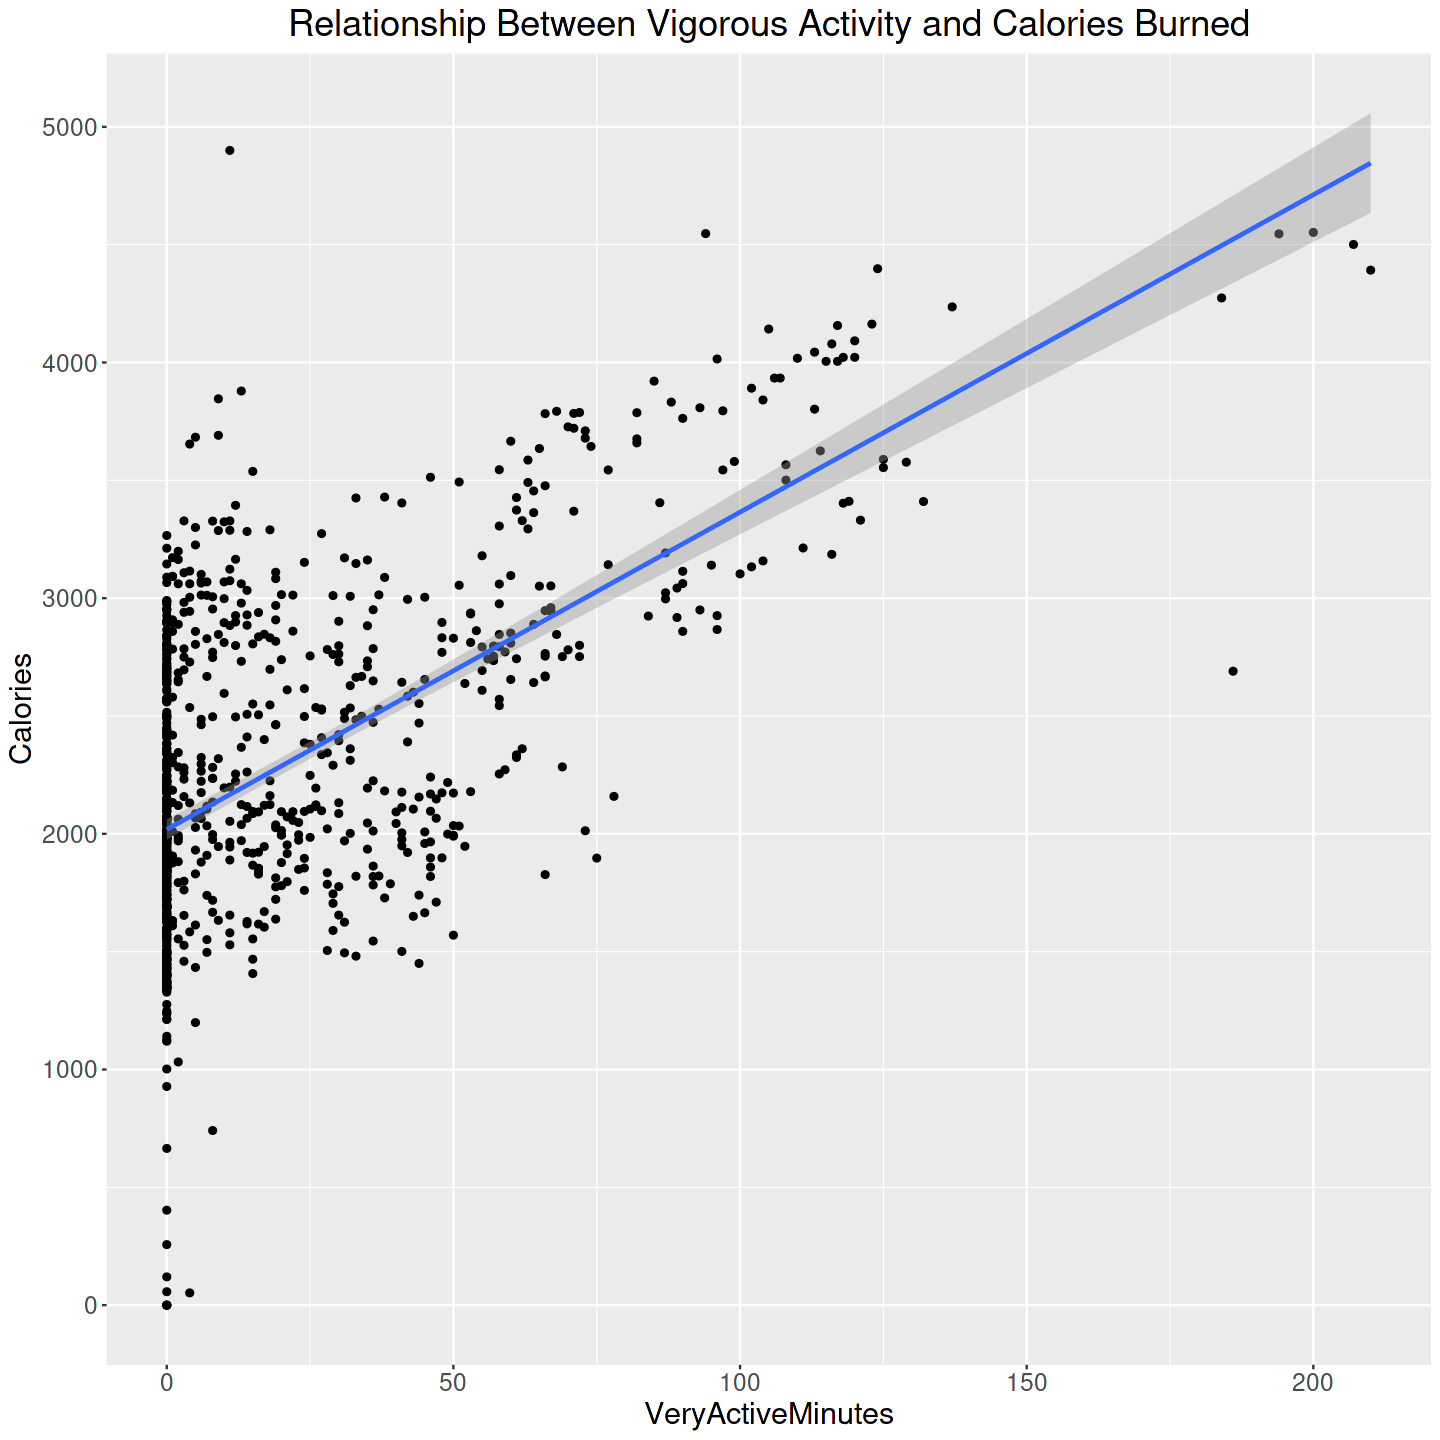

In [8]:
# Figure 1
options(repr.plot.width = 12, repr.plot.height = 12)
ggplot(data=daily_activity)+
  geom_point(mapping=aes(x=VeryActiveMinutes, y=Calories)) +
  geom_smooth(mapping=aes(x=VeryActiveMinutes, y=Calories), method=lm) +
  labs(title="Relationship Between Vigorous Activity and Calories Burned") +
  theme(text = element_text(size=18), plot.title = element_text(hjust = 0.5))

Figure 1 above shows the relationship between minutes spent doing vigorous activities (i.e., very active minutes) and calories burned. We see a positive correlation between these two variables. The more active the average user is, the more calories are burned.

`geom_smooth()` using formula 'y ~ x'



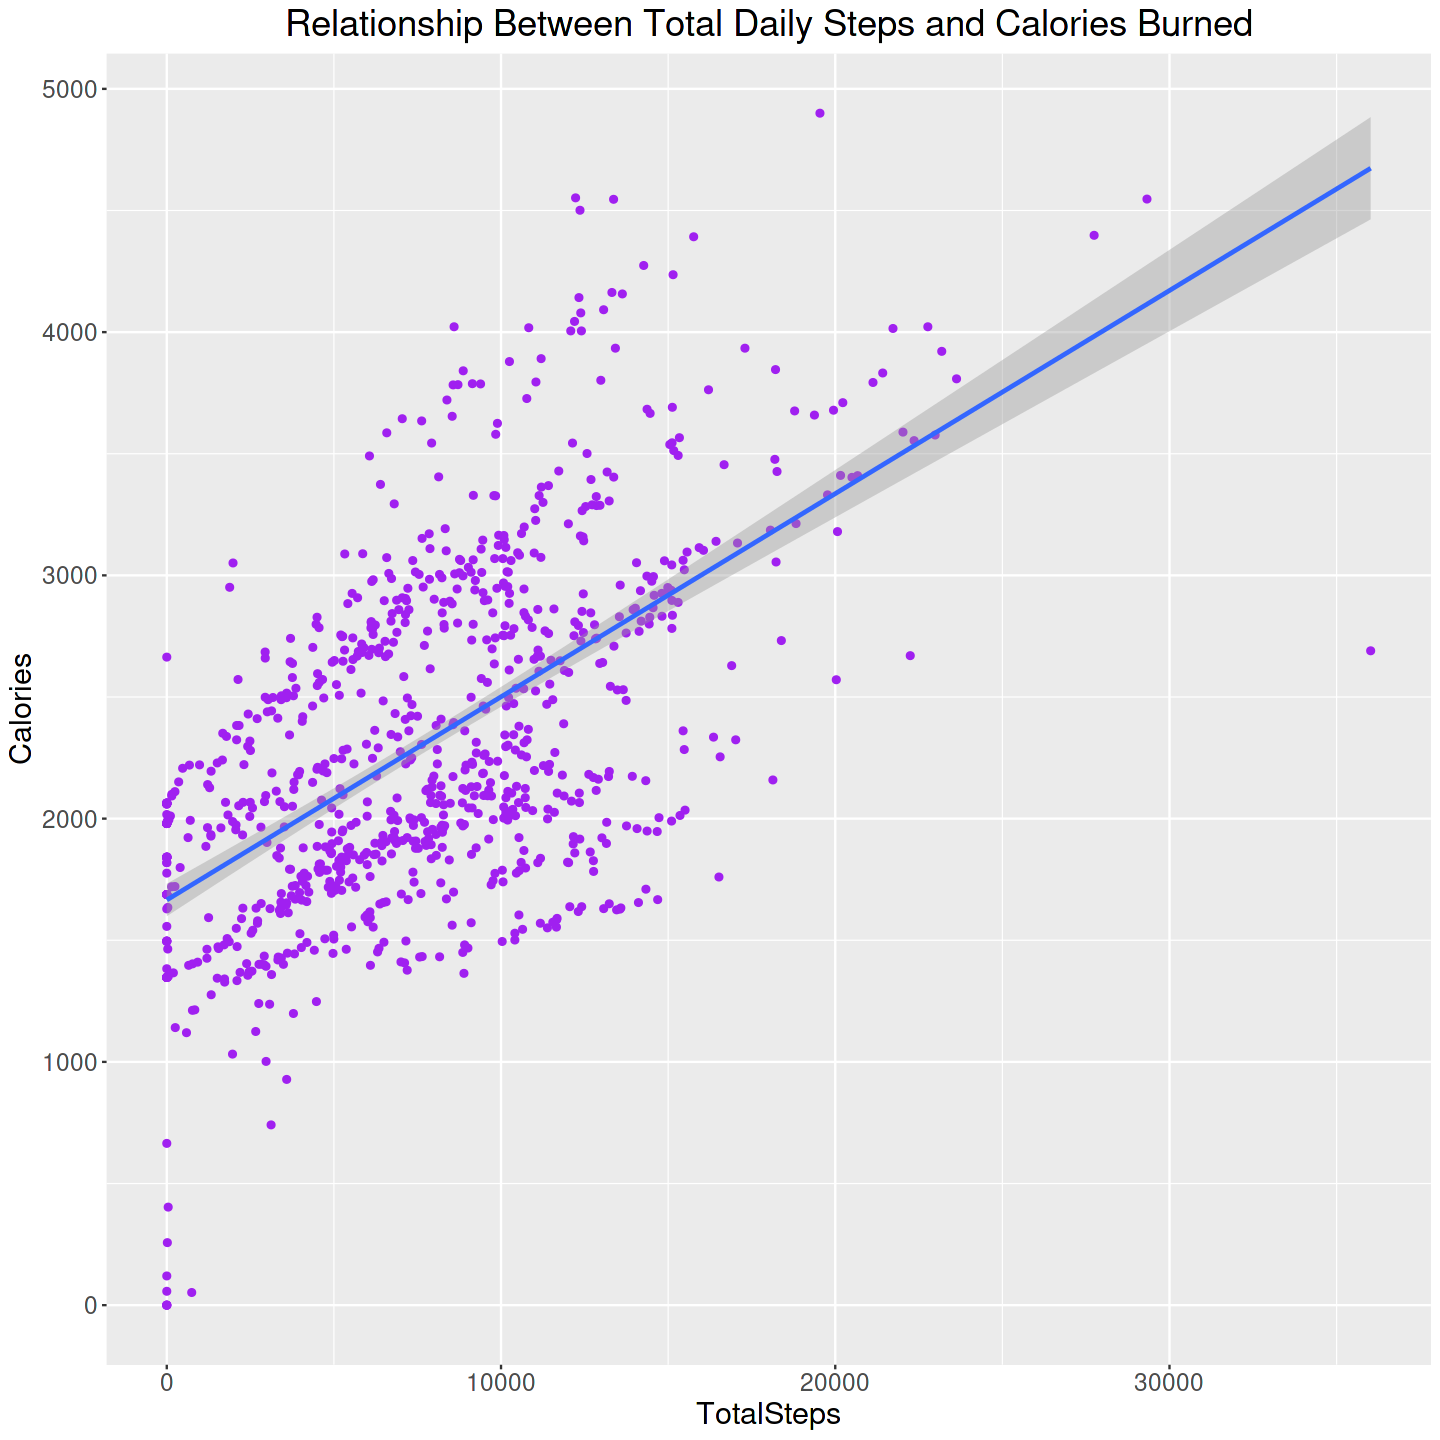

In [9]:
# Figure 2
options(repr.plot.width = 12, repr.plot.height = 12)
ggplot(data=daily_activity)+
  geom_point(mapping=aes(x=TotalSteps, y=Calories), color="Purple") +
  geom_smooth(mapping=aes(x=TotalSteps, y=Calories), method=lm) +
  labs(title="Relationship Between Total Daily Steps and Calories Burned") +
  theme(text = element_text(size=18), plot.title = element_text(hjust = 0.5))

Similarly, a positive relationship exists between daily calories burned and total steps taken, as shown in Figure 2 above.

`geom_smooth()` using formula 'y ~ x'



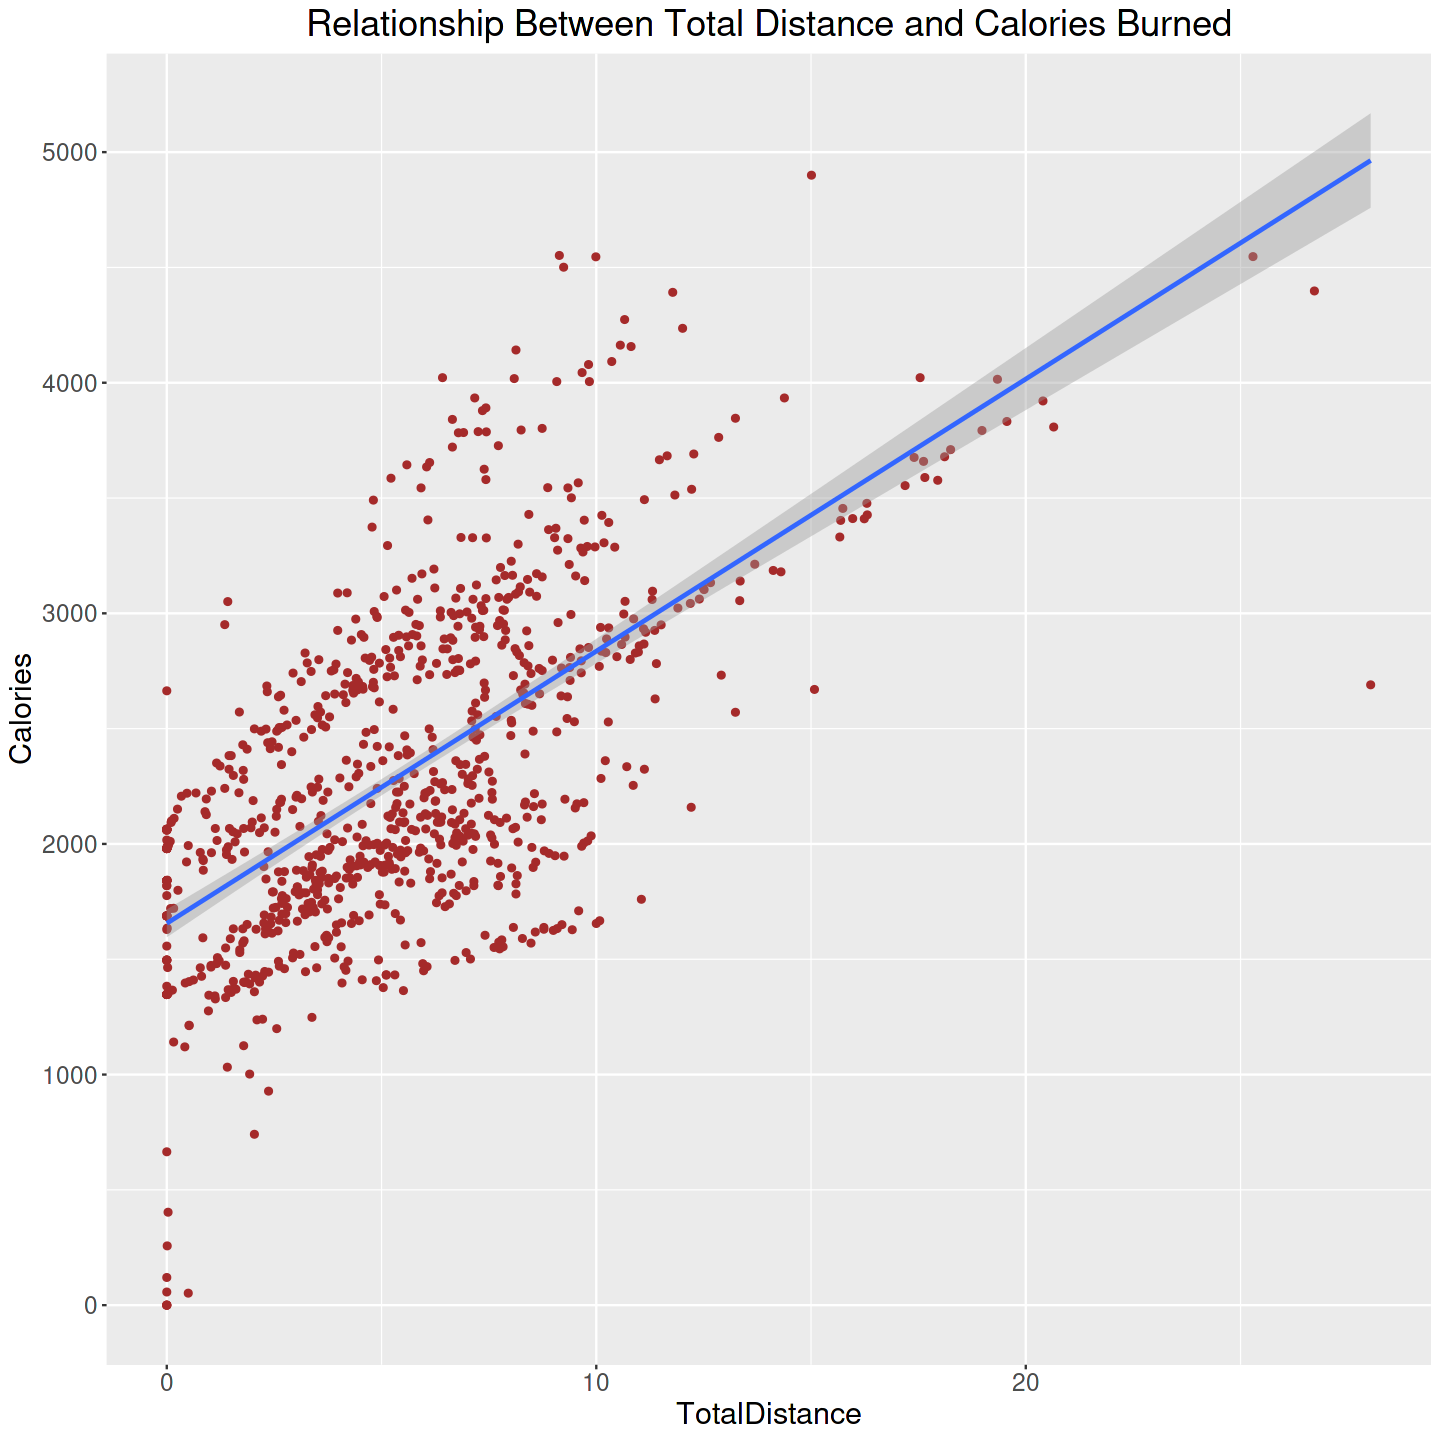

In [10]:
# Figure 3
options(repr.plot.width = 12, repr.plot.height = 12)
ggplot(data=daily_activity)+
  geom_point(mapping=aes(x=TotalDistance, y=Calories), color="Brown") +
  geom_smooth(mapping=aes(x=TotalDistance, y=Calories), method = lm) +
  labs(title="Relationship Between Total Distance and Calories Burned") +
  theme(text = element_text(size=18), plot.title = element_text(hjust = 0.5))

When total distance is plotted against calories burned as shown in Figure 3 above, we observe a relationship similar to that of Figure 2. The higher the total distance covered daily by the user, the higher the calories burned.

`geom_smooth()` using formula 'y ~ x'



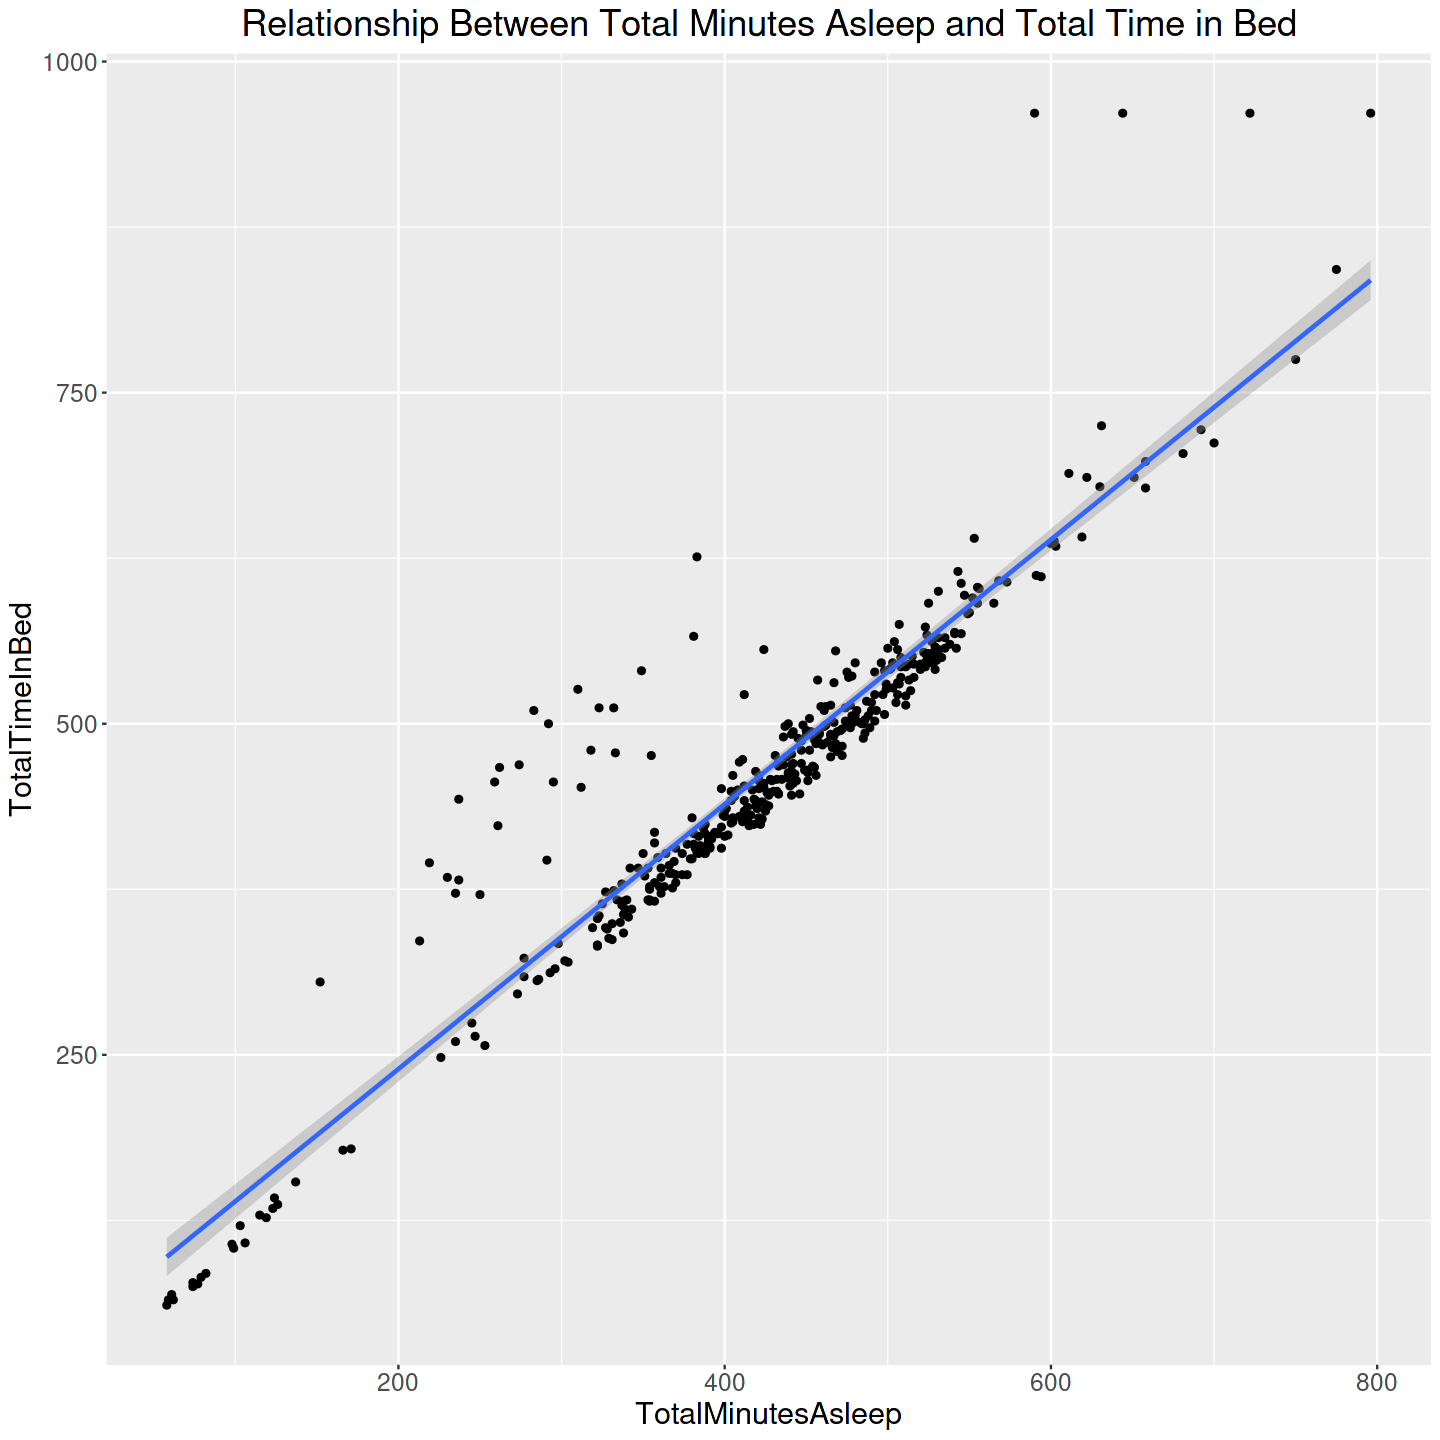

In [11]:
# Figure 4
options(repr.plot.width = 12, repr.plot.height = 12)
ggplot(data=sleep_day)+
  geom_point(mapping=aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) +
  geom_smooth(mapping=aes(x=TotalMinutesAsleep, y=TotalTimeInBed), method = lm) +
  labs(title="Relationship Between Total Minutes Asleep and Total Time in Bed") +
  theme(text = element_text(size=18), plot.title = element_text(hjust = 0.5))

In Figure 4 above, we see a close relationship between total time in bed and total time asleep. As suspected in the analysis doen earlier, we can infer that most users spent time in bed asleep.

`geom_smooth()` using formula 'y ~ x'



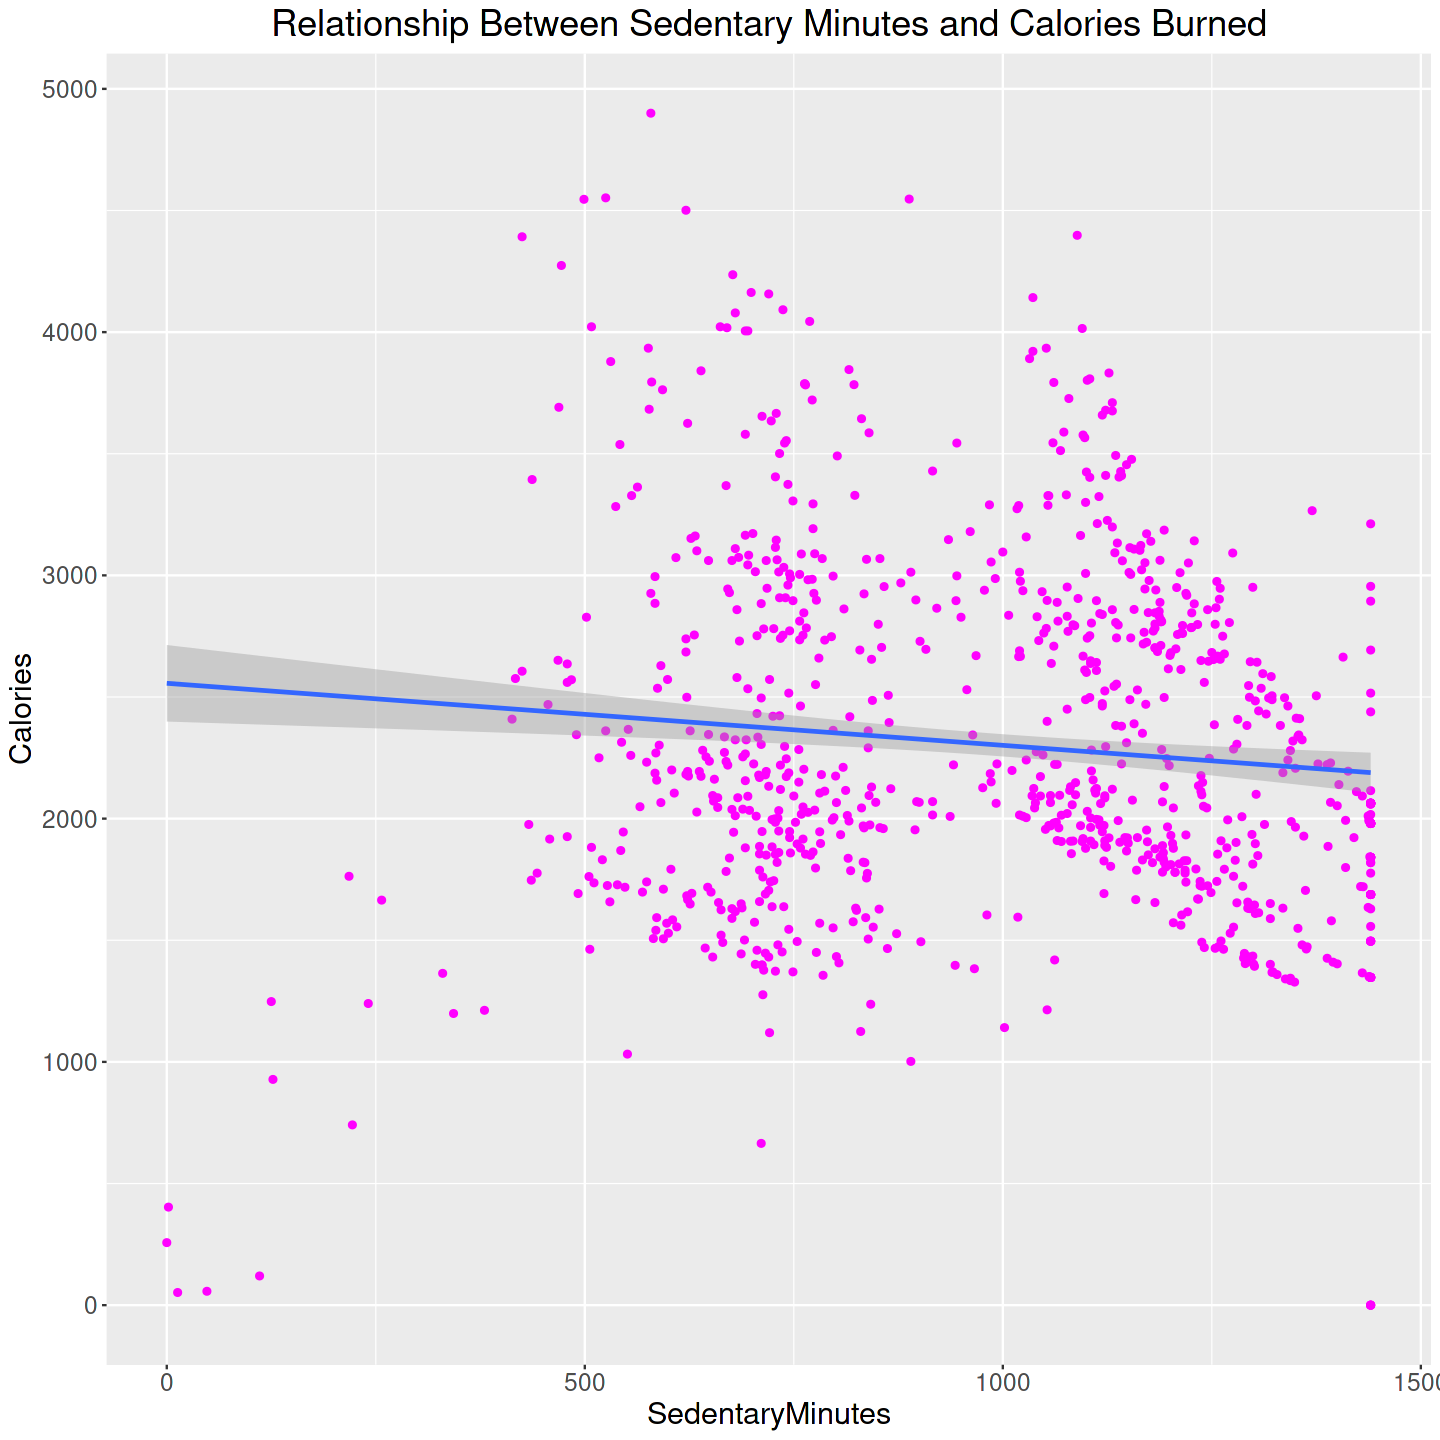

In [12]:
# Figure 5
options(repr.plot.width = 12, repr.plot.height = 12)
ggplot(data=daily_activity)+
  geom_point(mapping=aes(x=SedentaryMinutes, y=Calories), color="Magenta") +
  geom_smooth(mapping=aes(x=SedentaryMinutes, y=Calories), method = lm) +
  labs(title="Relationship Between Sedentary Minutes and Calories Burned") +
  theme(text = element_text(size=18), plot.title = element_text(hjust = 0.5))

In Figure 6, we see a negative relationship between calories burned and time spend doing sedentary activities.

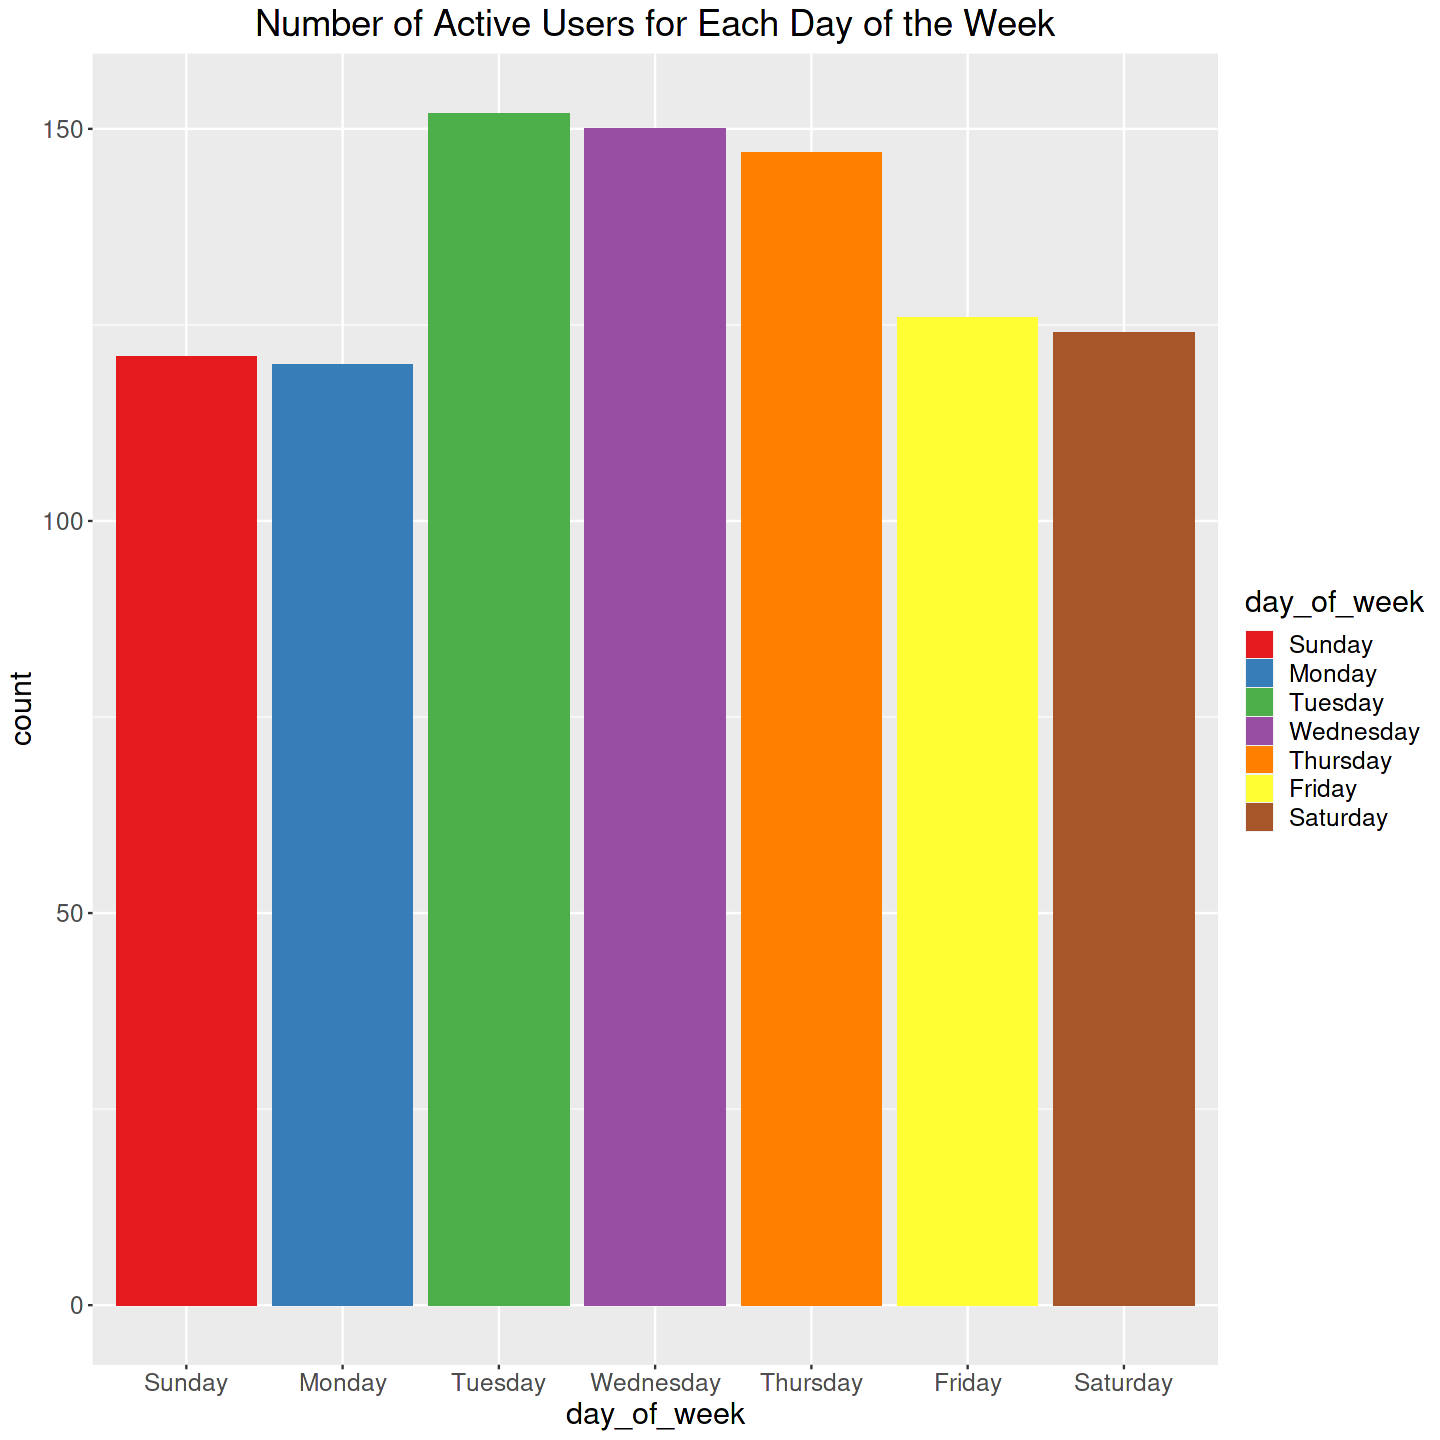

In [13]:
# Figure 6: Bar chart showing activity by day of the week
library(RColorBrewer)
options(repr.plot.width = 12, repr.plot.height = 12)
ggplot(data=daily_activity_3) +
  geom_bar(mapping=aes(x=day_of_week, fill=day_of_week)) +
  labs(title="Number of Active Users for Each Day of the Week") +
  scale_fill_brewer(palette="Set1") +
  theme(text = element_text(size=18), plot.title = element_text(hjust = 0.5))

To better understand how active the sampled users are, we explore user active hours by days of the week. From the bar chart in Figure 6 above, it is observed that the average user is active in the middle of the week, and least active on weekends. This may be explained by the lifestyle of users surveyed. If data on user demographics is made available, it may be helpful in understanding the distribution of active time during the week.

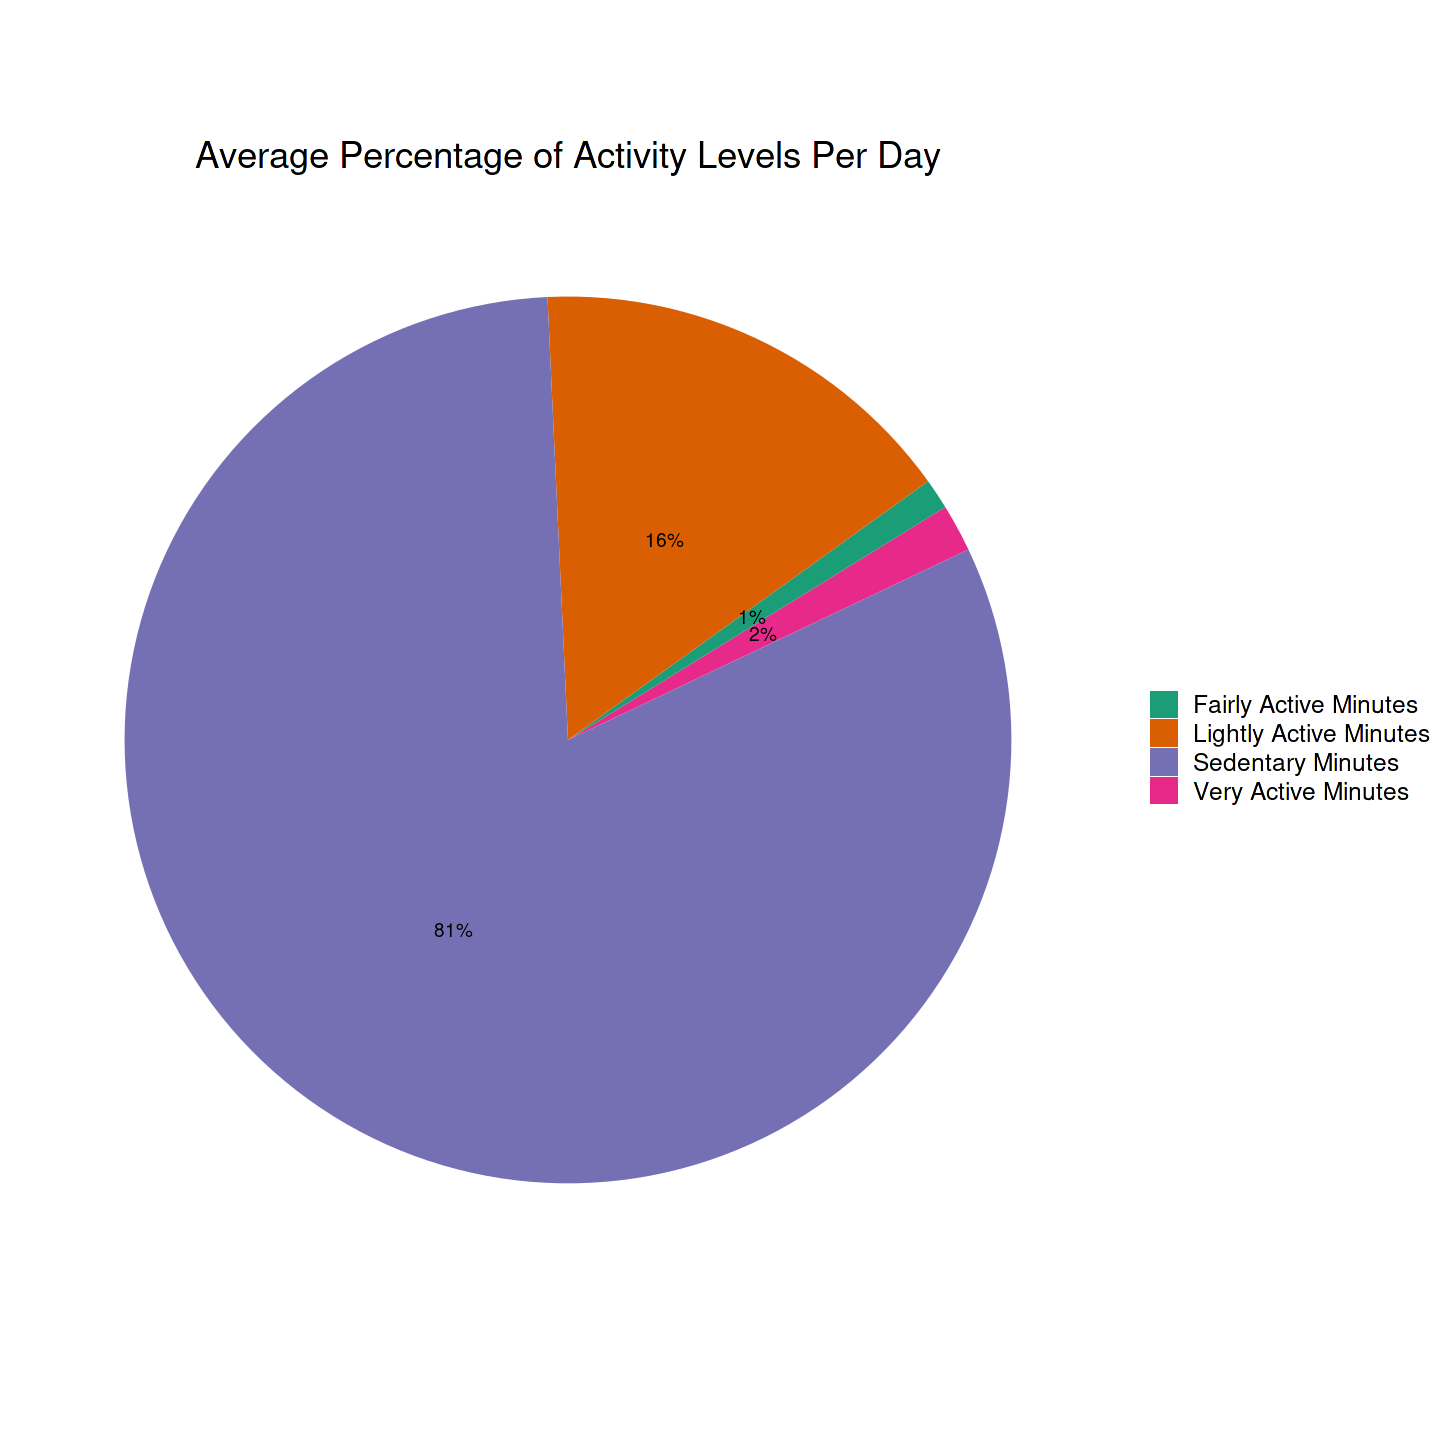

In [14]:
# Figure 7: Pie chart showing mean activity breakdown
options(repr.plot.width = 12, repr.plot.height = 12)
ggplot(data=daily_activity_pie, aes(x="", y=Percentage, fill=ActivityLevel))+
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=45) +
  geom_text(aes(label = paste0(round(Percentage),"%")), position=position_stack(vjust = 0.5)) +
  scale_fill_brewer(palette="Dark2") +
  labs(x = NULL, y = NULL, fill = NULL, title = "Average Percentage of Activity Levels Per Day") +
  theme_classic() + theme(axis.line = element_blank(),
                          axis.text = element_blank(),
                          axis.ticks = element_blank(),
                          plot.title = element_text(hjust = 0.5, color = "Black")) +
  theme(text = element_text(size=18), plot.title = element_text(hjust = 0.5))

In Figure 7, the proportion of activity time is shown based on level of activity. It can be observed that a significant proportion of total active time by the average user is spent doing sedentary activities.

## Act
### Conclusions
Based on the analysis conducted:
1. There is a clear relationship between calories burned and active time.
2. The more time a user spends on sedentary activities, the less calories the user burns on a daily basis.
3. The average user is most active mid-week and least active on weekends.
4. On average, a user spends about 81% of active time doing sedentary activities.
5. For the average user, total time spent in bed is close to total time asleep, indicating minimal struggle with insomnia. 

### Recommendations for Bellabeat 
To further expand business opportunities for Bellabeat, key findings from the analysis can be used to guide some business decisions. Some recommendations for Bellabeat app and products are as follows:
1. Recommend a minimum of 10,000 steps for users. This can drive a higher proportion of activity time dooing non-sedentary activities.
2. Enable periodic reminders (e.g., push notifications) for users to take a minimum number of steps every hour.
3. Provide options for tracking other health-related data like weight. 
4. Provide in-app wellness tips and suggestions.
5. Create weekend fitness challenges to encourage users to be more active on weekends.


#### References:
1. G;, J. M. S. K. B. (n.d.). Metabolic equivalents (Mets) in exercise testing, exercise prescription, and evaluation of functional capacity. Clinical cardiology. Retrieved January 1, 2022, from https://pubmed.ncbi.nlm.nih.gov/2204507/ 
2. Roland, J. (2019, October 21). What Are METs, and How Are They Calculated? Retrieved from https://www.healthline.com/health/what-are-mets